In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import SGD

In [75]:
train=pd.read_csv('cfir_train.csv')
test=pd.read_csv('cfir_test.csv')

In [76]:
train.shape



(50000, 3073)

In [77]:
test.shape

(10000, 3073)

In [80]:
x_train=train.drop(['label'],axis=1).values
y_train=train['label'].values

In [81]:
x_test=test.drop(['label'],axis=1).values
y_test=test['label'].values

In [82]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [83]:
x_train=x_train.reshape(50000,32,32,3)
x_test=x_test.reshape(10000,32,32,3)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


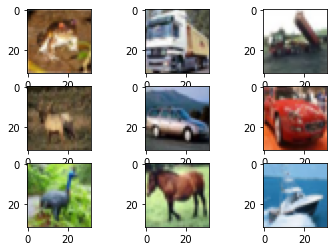

In [84]:
 for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])


In [85]:
#defining the model architecture
model= Sequential()
model.add(Flatten(input_shape = (32,32,3)))
#model.add(Dense(128,input_shape = (784, ),activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation="softmax"))


# for learniung rate specification
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate = 0.1)

# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)               

In [86]:
name_model=model.fit(x_train,y_train,batch_size=64,epochs=11,validation_split=0.2)

Epoch 1/11
625/625 [==============================] - 9s 10ms/step - loss: 2.1323 - accuracy: 0.2037 - val_loss: 1.9563 - val_accuracy: 0.2995
Epoch 2/11
625/625 [==============================] - 5s 8ms/step - loss: 1.9417 - accuracy: 0.2864 - val_loss: 1.8557 - val_accuracy: 0.3359
Epoch 3/11
625/625 [==============================] - 5s 9ms/step - loss: 1.8711 - accuracy: 0.3210 - val_loss: 1.7996 - val_accuracy: 0.3678
Epoch 4/11
625/625 [==============================] - 5s 9ms/step - loss: 1.8301 - accuracy: 0.3376 - val_loss: 1.7525 - val_accuracy: 0.3808
Epoch 5/11
625/625 [==============================] - 5s 9ms/step - loss: 1.7935 - accuracy: 0.3519 - val_loss: 1.7372 - val_accuracy: 0.3897
Epoch 6/11
625/625 [==============================] - 5s 9ms/step - loss: 1.7627 - accuracy: 0.3648 - val_loss: 1.6918 - val_accuracy: 0.4043
Epoch 7/11
625/625 [==============================] - 5s 8ms/step - loss: 1.7349 - accuracy: 0.3747 - val_loss: 1.6746 - val_accuracy: 0.4066
Epoch

In [87]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


4


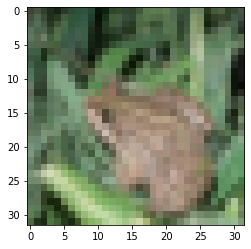

In [88]:
plt.imshow(x_test[4])
print(pred.argmax(axis=1)[4])

In [89]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.5726 - accuracy: 0.4433


In [90]:
name_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

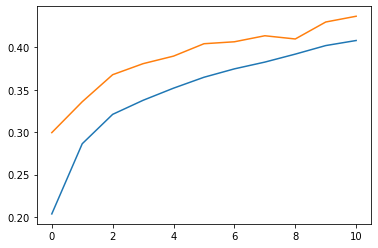

In [91]:
plt.plot(name_model.history['accuracy'])
plt.plot(name_model.history['val_accuracy'])

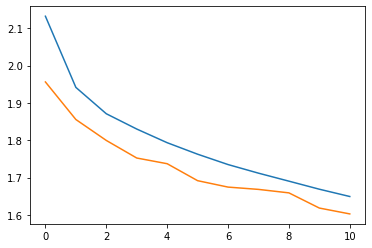

In [92]:
plt.plot(name_model.history['loss'])
plt.plot(name_model.history['val_loss'])